In [3]:
import Ipynb_importer

In [9]:
import TrodesReader
from collections import deque
import numpy as np
import math
from scipy import signal
import matplotlib.pyplot as plt

In [10]:
def bandpass_filter(filter_name, flattened_array, sampling_freq, order, lowcut, highcut):
    if filter_name == 'elliptical':
        sos = signal.ellip(order, 0.01, 120, [lowcut, highcut], btype='bp', output='sos', fs=sampling_freq)
    if filter_name == 'butterworth':
        sos = signal.butter(order, [lowcut, highcut], 'bp', fs=sampling_freq, output='sos')
    if filter_name == 'cheby1':
        sos = signal.cheby1(order, 1, [lowcut, highcut], 'bp', fs=sampling_freq, output='sos')
    if filter_name == 'cheby2':
        sos = signal.cheby2(order, 15, [lowcut, highcut], 'bp', fs=sampling_freq, output='sos')

    y = signal.sosfiltfilt(sos, flattened_array)

    return y


def calculate_rms(buffer):
    square_summed = 0
    for k in buffer:
        square_summed += (k ** 2)

    return math.sqrt(square_summed / len(buffer))


def filter_then_rms(buffer, low_cut, high_cut, threshold):
    filtered_buffer = bandpass_filter('butterworth', buffer, lfp_sampling_rate, 1, low_cut, high_cut)
    current_rms = calculate_rms(filtered_buffer)
    return current_rms >= threshold

In [70]:
# this is the 5 min data
time_path = r'C:\Users\mengz\Box\Jhan (Mengzhan Liufu)\ClosedLoopControl Project\DATA\20211117_testing_5min\20211117_testing_5min.LFP\20211117_testing_5min.timestamps.dat'
data_path = r'C:\Users\mengz\Box\Jhan (Mengzhan Liufu)\ClosedLoopControl Project\DATA\20211117_testing_5min\20211117_testing_5min.LFP\20211117_testing_5min.LFP_nt28ch1.dat'

In [14]:
data = TrodesReader.readTrodesExtractedDataFile(data_path)
from pprint import pprint
pprint(data)

{'accelerometer': '1',
 'autosettle': '0',
 'byte_order': 'little endian',
 'clockrate': '30000',
 'commit_tag': 'heads/develop2-0-g14289d93',
 'compile_date': 'Sep 16 2021',
 'compile_time': '10:58:19',
 'controller_firmware': '3.17',
 'controller_serialnum': '00104 00153',
 'data': array([( 27,), (162,), (256,), ..., (723,), (638,), (570,)],
      dtype=[('voltage', '<i2')]),
 'description': 'LFP data for one channel',
 'fields': '<voltage int16>',
 'first_timestamp': '10862394',
 'gyro': '1',
 'headstage_firmware': '3.1',
 'headstage_serialnum': '00407 00133',
 'low_pass_filter': '200',
 'magnetometer': '0',
 'ntrode_channel_number': '1',
 'ntrode_id': '28',
 'num_channels': '4',
 'original_file': '20211117_testing_5min.rec',
 'qt_version': '5.15.1',
 'reference': 'on',
 'referencechannel': '1',
 'referencentrode': '27',
 'smartref': '0',
 'system_time_at_creation': '1637166858747',
 'time_offset': '0',
 'timestamp_at_creation': '2892331',
 'trodes_version': '2.2.3',
 'voltage_scali

In [71]:
time = TrodesReader.readTrodesExtractedDataFile(time_path)
pprint(time)

{'accelerometer': '1',
 'autosettle': '0',
 'byte_order': 'little endian',
 'clockrate': '30000',
 'commit_tag': 'heads/develop2-0-g14289d93',
 'compile_date': 'Sep 16 2021',
 'compile_time': '10:58:19',
 'controller_firmware': '3.17',
 'controller_serialnum': '00104 00153',
 'data': array([(10862400,), (10862420,), (10862440,), ..., (21850540,),
       (21850560,), (21850580,)], dtype=[('time', '<u4')]),
 'decimation': '20',
 'description': 'LFP timestamps',
 'fields': '<time uint32>',
 'first_timestamp': '10862394',
 'gyro': '1',
 'headstage_firmware': '3.1',
 'headstage_serialnum': '00407 00133',
 'magnetometer': '0',
 'original_file': '20211117_testing_5min.rec',
 'qt_version': '5.15.1',
 'smartref': '0',
 'system_time_at_creation': '1637166858747',
 'time_offset': '0',
 'timestamp_at_creation': '2892331',
 'trodes_version': '2.2.3'}


In [72]:
start_time = int(time['first_timestamp'])
time_data = []
for i in time['data']:
    time_data.append((i[0]-start_time)/30000)
    
time_data

[0.0002,
 0.0008666666666666666,
 0.0015333333333333334,
 0.0022,
 0.0028666666666666667,
 0.003533333333333333,
 0.0042,
 0.004866666666666667,
 0.005533333333333334,
 0.0062,
 0.006866666666666667,
 0.007533333333333334,
 0.0082,
 0.008866666666666667,
 0.009533333333333333,
 0.0102,
 0.010866666666666667,
 0.011533333333333333,
 0.0122,
 0.012866666666666667,
 0.013533333333333333,
 0.0142,
 0.014866666666666667,
 0.015533333333333333,
 0.0162,
 0.016866666666666665,
 0.017533333333333335,
 0.0182,
 0.018866666666666667,
 0.019533333333333333,
 0.0202,
 0.020866666666666665,
 0.021533333333333335,
 0.0222,
 0.022866666666666667,
 0.023533333333333333,
 0.0242,
 0.024866666666666665,
 0.025533333333333335,
 0.0262,
 0.026866666666666667,
 0.027533333333333333,
 0.0282,
 0.028866666666666665,
 0.029533333333333335,
 0.0302,
 0.030866666666666667,
 0.03153333333333333,
 0.0322,
 0.03286666666666667,
 0.03353333333333333,
 0.0342,
 0.034866666666666664,
 0.03553333333333333,
 0.0362,
 0

In [24]:
lfp_sampling_rate = 1500
lfp_sampling_period = (1/lfp_sampling_rate)*(10**9)

#lower_bound = 10000
#upper_bound = 19000
upper_freq = 250
lower_freq = 140
num_std = 3

In [25]:
all_data = data['data']
lfp_data = []
for i in all_data:
    lfp_data.append(i[0])
    
filtered_lfp_data = bandpass_filter('butterworth', lfp_data, lfp_sampling_rate, 1, lower_freq, upper_freq)

<IPython.core.display.Javascript object>


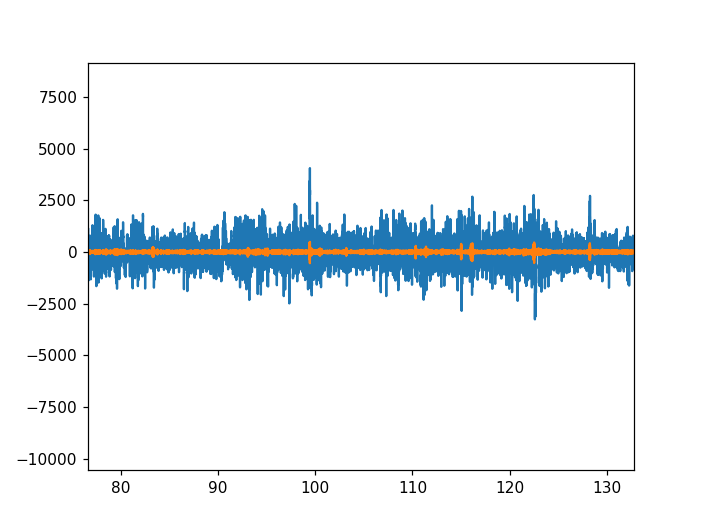

In [77]:
%matplotlib notebook
fig1 = plt.figure()
plt.plot(time_data,lfp_data)
plt.plot(time_data,filtered_lfp_data)
#plt.xticks(np.arange(0,num_sec,step=1))
plt.show()

In [28]:
offline_rms = []
for i in range(499, len(lfp_data)):
    current_buffer = filtered_lfp_data[i-499:i]
    offline_rms.append(calculate_rms(current_buffer))

In [30]:
online_rms = []
for i in range(499, len(lfp_data)):
    current_buffer = lfp_data[i-499:i]
    current_filtered = bandpass_filter('butterworth', current_buffer, lfp_sampling_rate, 1, lower_freq, upper_freq)
    online_rms.append(calculate_rms(current_filtered))

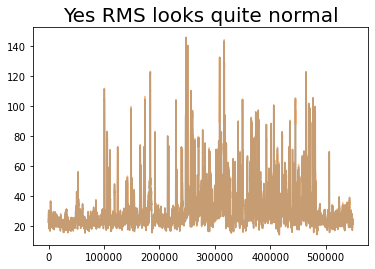

In [44]:
fig2 = plt.figure()
plt.plot(offline_rms,alpha=0.5)
#fig3 = plt.figure()
plt.plot(online_rms,alpha=0.5)
plt.title("Yes RMS looks quite normal",fontsize=20)
plt.show()

In [34]:
avg_offline = np.mean(offline_rms)
std_offline = np.std(offline_rms)

In [35]:
avg_online = np.mean(online_rms)
std_online = np.std(online_rms)

In [36]:
zscore_offline = []
zscore_online = []

for i in range(0,len(online_rms)):
    zscore_offline.append((offline_rms[i]-avg_offline)/std_offline)
    zscore_online.append((online_rms[i]-avg_online)/std_online)

<IPython.core.display.Javascript object>


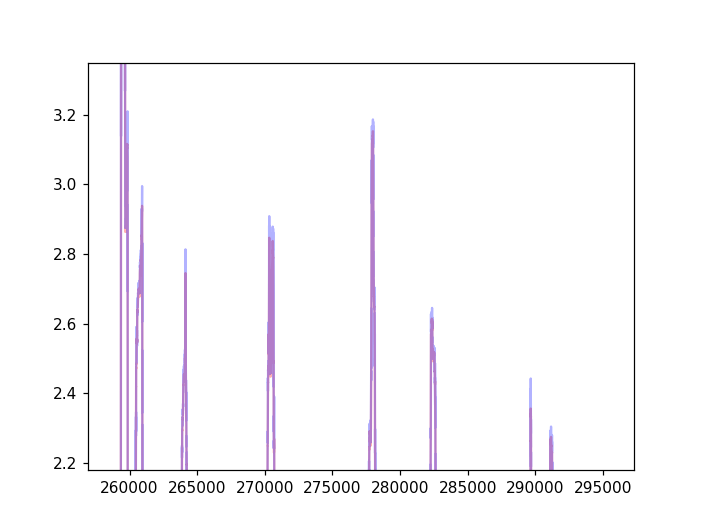

In [50]:
%matplotlib notebook
fig4 = plt.figure()
plt.plot(zscore_offline,color='r',alpha=0.3)
#fig5= plt.figure()
plt.plot(zscore_online,color='b',alpha=0.3)
#plt.title("Yes Z Score looks quite normal",fontsize=20)
plt.show()